In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [16]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [19]:
df = pd.concat([train, test], sort=False)
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [20]:
#get types of columns
df.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

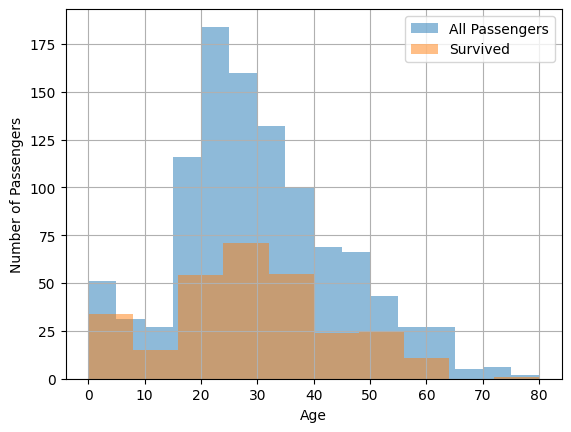

In [72]:
#make a stacked bar chart of survival by age
df['Age'].hist(bins=16, range=(0,80), alpha=0.5)
df[df['Survived']==1]['Age'].hist(bins=16, range=(0,80), alpha=0.5)
plt.legend(['All Passengers', 'Survived'])
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()



<AxesSubplot: >

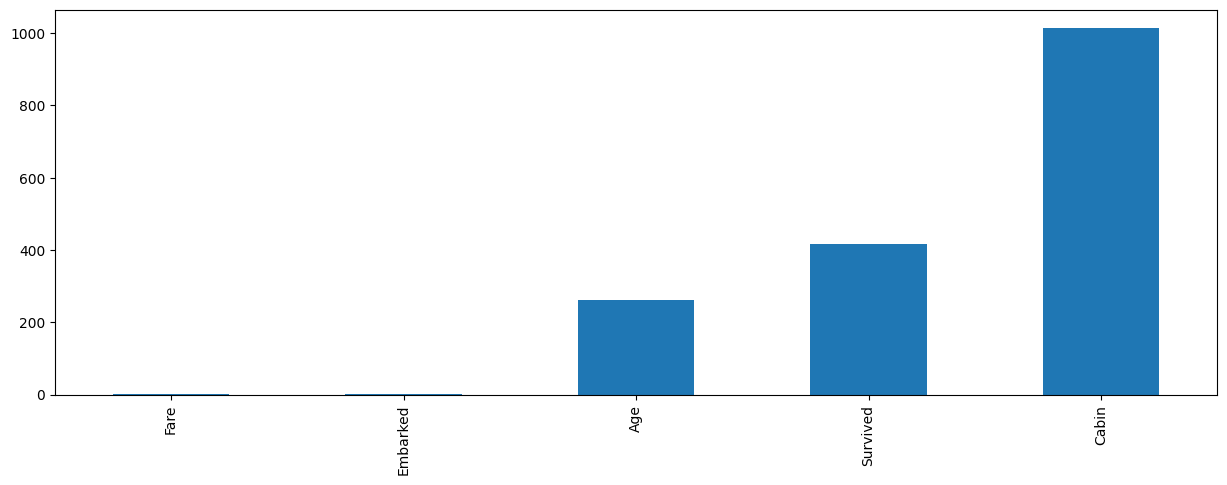

In [81]:
#make a bar chart of percentage of missing values in each column
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()


In [82]:
#replace missing values in age with median age
df['Age'].fillna(df['Age'].median(), inplace=True)

#convert column age to int
df['Age'] = df['Age'].astype(int)

In [97]:
#df grouped by age with sum of survived and total passengers
age_df = df.groupby(['Age', 'Survived'])['Survived'].count()
age_df = age_df.unstack('Survived')
age_df.columns = ['Died', 'Survived']
age_df['Total'] = age_df['Died'] + age_df['Survived']
age_df['Survival Rate'] = age_df['Survived'] / age_df['Total']
age_df

,Died,Survived,Total,Survival Rate
Age,,,,
0,NaN,7.0,NaN,NaN
1,2.0,5.0,7.0,0.714286
2,7.0,3.0,10.0,0.300000
3,1.0,5.0,6.0,0.833333
4,3.0,7.0,10.0,0.700000
...,...,...,...,...
66,1.0,NaN,NaN,NaN
70,3.0,NaN,NaN,NaN
71,2.0,NaN,NaN,NaN


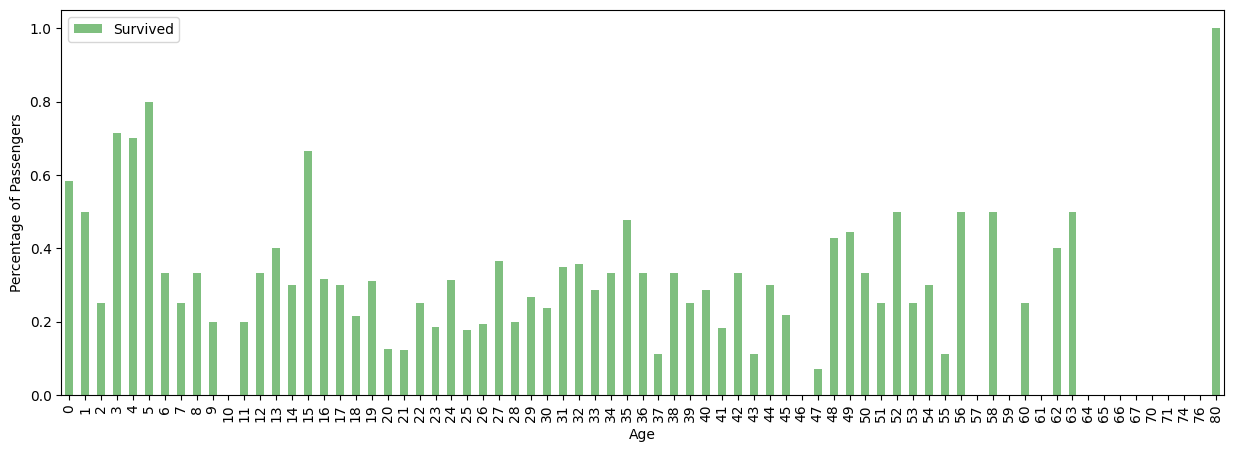

In [83]:
#make a percentage stacked bar chart of survival by age
survived = df[df['Survived']==1]['Age'].value_counts()
all = df['Age'].value_counts()
survived = survived.sort_index()
all = all.sort_index()
survived = survived.divide(all)
survived.plot(kind='bar', stacked=True, color='green', alpha=0.5)
plt.legend(['Survived'])
plt.xlabel('Age')
plt.ylabel('Percentage of Passengers')


#make chart larger
plt.rcParams['figure.figsize'] = [15, 5]

plt.show()


In [63]:
# set the figure size
plt.figure(figsize=(14, 14))

# from raw value to percentage
total = df.groupby('Age').sum().reset_index()
Survived = df[df.Survived=='Yes'].groupby('Age').sum().reset_index()
Survived['total_bill'] = [i / j * 100 for i,j in zip(smoker['total_bill'], total['total_bill'])]
total['total_bill'] = [i / j * 100 for i,j in zip(total['total_bill'], total['total_bill'])]

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="day",  y="total_bill", data=total, color='darkblue')

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="day", y="total_bill", data=smoker, color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='smoker = No')
bottom_bar = mpatches.Patch(color='lightblue', label='smoker = Yes')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

ValueError: Could not interpret value `Age` for parameter `x`

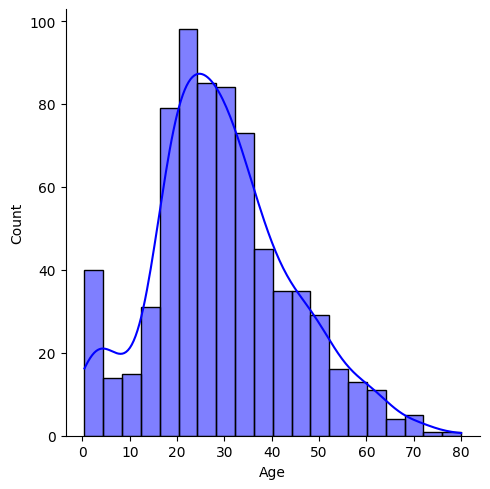

In [47]:
#make a histogram of the ages
g = sns.FacetGrid(train, height=5)
g.map_dataframe(sns.histplot, x="Age", kde=True, bins=20, color="blue")


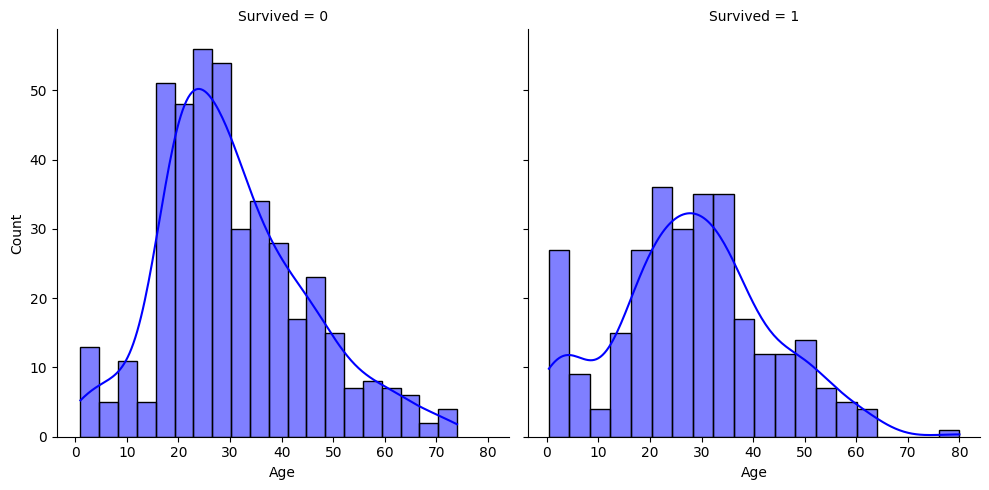

In [53]:
#make a histogram of the ages with index Survived
g = sns.FacetGrid(train, col='Survived', height=5)
g.map_dataframe(sns.histplot, x="Age", kde=True, bins=20, color="blue")
